# **Connect 4 with AI**
- **`Connect 4`**: is a two-player connection boad game, in which the players choose a color and then take turns dropping colored dics into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The object of the game is to be the first to form a horizontal, vertical, or diagonal line of 4 of one's own discs.
- **`Purpose of this Project`**: develop, implement, and experiment with different `artificial intelligence` techniques that enable one to make the best move possible in Connect 4 that results in higher win rates. 

# Step 1: Defining the search problem
- The first step in this project is defining the search problem for Connect 4, which includes the following: 
* `Initial state` of the board.
* `Actions` performed during the game.
* `Transition model` or the updated board after an action is performed.
* `Goal state` which includes both the `terminal state` (i.e. when either players wins or there is a draw) and a `utility state` (for example, giving PLAYER 1 a +1 if they win and PLAYER 2 a -1 if they win instead) 

### Modules, Libraries, & Constants
- The following block of code includes the modules & libraries used throughout the project, as well as constants. 
- In this project, instead of using 'red' and 'yellow' to denote traditional disc pieces, I've used the numbers '1' and '-1' to denote the pieces, and '0' to denote an empty spot on the board.

In [1]:
# Modules & Libraries
import numpy as np
import random
import time
import matplotlib.pyplot as plt

# Constants

# Constants to represent the dimensions of the game board
ROW_COUNT = 6
COLUMN_COUNT = 7

# Constant to represent the empty slots
EMPTY = 0

# Constants representing PLAYER 1 and PLAYER 2 indices
PLAYER_1 = 1
PLAYER_2 = -1

# Constants representing PLAYER 1 and PLAYER 2 game pieces on the board
P1_PIECE = 1
P2_PIECE = -1

In [2]:
# Initial State
# The initial state is an empty board representing the columns and rows of Connect 4
initial_state = np.zeros((ROW_COUNT, COLUMN_COUNT), dtype=int)
print(initial_state)

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


In [3]:
# Function that creates a board with specified rows and columns
def create_board(rows=ROW_COUNT, columns=COLUMN_COUNT):
    return np.zeros((rows, columns), dtype=int)

In [4]:
# Function to get valid actions (columns with available space)
# The actions will be placing a piece into a column if space is available, with the players alternating their turns.
def actions(board):
    return [col for col in range(board.shape[1]) if board[0][col] == EMPTY]

In [5]:
# Transition model: Result Function that updates the board when an action is done.
# Updates the board with the player's piece that was just placed. 
# Checks for illegal moves or if column is full
# Result(s, a) = s' 
# Result(board, action) = new board state 
def result(board, player, action):
    if board[0][action] != EMPTY:
        print("Error: Illegal move!")
        return None

    row = next((i for i in range(board.shape[0]-1, -1, -1) if board[i][action] == EMPTY), None)

    if row is not None:
        board[row][action] = P1_PIECE if player == PLAYER_1 else P2_PIECE
        return board
    else:
        print("Error: Column is full!")
        return None

In [6]:
# Function to check winning moves
def winning_move(board, piece):
    for c in range(board.shape[1] - 3):
        for r in range(board.shape[0]):
            if (
                board[r][c] == piece
                and board[r][c + 1] == piece
                and board[r][c + 2] == piece
                and board[r][c + 3] == piece
            ):
                return True
    for c in range(board.shape[1]):
        for r in range(board.shape[0] - 3):
            if (
                board[r][c] == piece
                and board[r + 1][c] == piece
                and board[r + 2][c] == piece
                and board[r + 3][c] == piece
            ):
                return True
    for c in range(board.shape[1] - 3):
        for r in range(board.shape[0] - 3):
            if (
                board[r][c] == piece
                and board[r + 1][c + 1] == piece
                and board[r + 2][c + 2] == piece
                and board[r + 3][c + 3] == piece
            ):
                return True
    for c in range(board.shape[1] - 3):
        for r in range(3, board.shape[0]):
            if (
                board[r][c] == piece
                and board[r - 1][c + 1] == piece
                and board[r - 2][c + 2] == piece
                and board[r - 3][c + 3] == piece
            ):
                return True
    return False

# Terminal state function that checks if a terminal state has been reached
# The terminal state is when either player wins or there is a draw
def is_terminal_state(board):
    return winning_move(board, P1_PIECE) or winning_move(board, P2_PIECE) or EMPTY not in board[0]

In [7]:
# Utility function for each terminal state 
# If PLAYER 1 wins: +1, if PLAYER 2 wins: -1, if Draw: 0
def utility(board):
    if winning_move(board, P1_PIECE):
        return 1  # PLAYER 1 wins
    elif winning_move(board, P2_PIECE):
        return -1  # PLAYER 2 wins
    elif EMPTY not in board[0]:
        return 0  # Draw
    else:
        return None  # Game is still ongoing

# Step 2: Creating a game environment and a random agent
- The standard board is 6x7, but due to the large state space and extensive search of the board, I tested my code with smaller boards. 


In [10]:
# This uses a numpy character array as the board
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


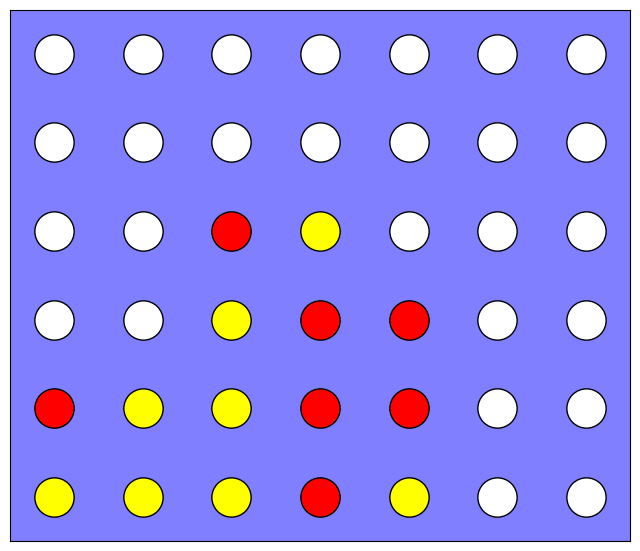

In [12]:
# This is a visualization of a traditional board
import matplotlib.pyplot as plt

def visualize(board):
    plt.figure(figsize=(8, 8))  
    plt.axes().set_aspect('equal', 'box')  

    # Dark background
    plt.gca().set_facecolor((0, 0, 1, 0.5))

    # Draws the circles for the pieces
    for i, row in enumerate(board):
        for j, val in enumerate(row):
            color = 'white' if val == 0 else 'red' if val == 1 else 'yellow'
            plt.scatter(j, -i, s=800, c=color, edgecolors='black', linewidth=1, zorder=2)

    # Set limits and remove ticks
    plt.xlim(-0.5, len(board[0]) - 0.5)
    plt.ylim(-len(board) + 0.5, 0.5)
    plt.xticks([])
    plt.yticks([])

    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, -1, 0, 0, 0],
         [0, 0, -1, 1, 1, 0, 0],
         [1, -1, -1, 1, 1, 0, 0],
         [-1, -1, -1, 1, -1, 0, 0]]
visualize(board)


## **`a)`** First task for **Step 2** is to implement helper functions for the following:
* A check for available actions in each state `actions(s)`.
* The transition model `result(s, a)`.
* Check for terminal states `terminal(s)`.
* The utility function `utility(s)`.

In [8]:
def actions(board, player=1):
    return [col for col in range(board.shape[1]) if board[0][col] == EMPTY]

def result(board, player, action):
    # Checks if the action is valid
    if board[0][action] != 0:
        print("Error: Illegal move!")
        return None
    
    # Finds the row where the piece can be placed
    row = None
    for i in range(len(board) - 1, -1, -1):
        if board[i][action] == 0:
            row = i
            break
    
    # Places the piece in the correct row
    if row is not None:
        board[row][action] = player
        return board
    else:
        # If no row is found, the column is full
        print("Error: Column is full!")
        return None

def is_terminal_state(board, player=1):
    return winning_move(board, P1_PIECE) or winning_move(board, P2_PIECE) or EMPTY not in board[0]

def utility(board, player=1):
    if winning_move(board, P1_PIECE):
        return 1  # PLAYER 1 wins
    elif winning_move(board, P2_PIECE):
        return -1  # PLAYER 2 wins
    elif EMPTY not in board[0]:
        return 0  # Draw
    else:
        return None  # Game is still ongoing

## **`b)`** Second task for **Step 2** is to implement an agent that plays randomly. The agent function receives  the board as the percept and returns a valid action. 

In [10]:
def random_player(board, player=1):
    valid_actions = actions(board)
    action = random.choice(valid_actions)
    player_name = "PLAYER 1" if player == PLAYER_1 else "PLAYER 2"
    return action

initial_board = create_board(rows=6, columns=7)
starting_player = random.choice([PLAYER_1, PLAYER_2]) 
player = starting_player


# Game loop 
while not is_terminal_state(initial_board):
    if player == 1:
        action = random_player(initial_board, player)
    else:
        action = random_player(initial_board, player)
    
    # Updates the board with the chosen action
    updated_board = result(initial_board, player, action)
    
    # If the move is legal, updates the board and switches player
    if updated_board is not None:
        initial_board = updated_board
        print("Updated Board:")
        print(initial_board)
        player = -1 if player == 1 else 1
    else:
        print(f"Invalid move by player {player}, skipping turn.")

# Determines the winner at the end of the game
if winning_move(initial_board, 1):
    winner = "PLAYER 1"
elif winning_move(initial_board, -1):
    winner = "PLAYER 2"
else:
    winner = "Draw"

print("Winner:", winner)

Updated Board:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1]]
Updated Board:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 -1]]
Updated Board:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 1  0  0 -1  0  0 -1]]
Updated Board:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 1  0  0 -1  0  1 -1]]
Updated Board:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1]
 [ 1  0  0 -1  0  1 -1]]
Updated Board:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1]
 [ 1  0  1 -1  0  1 -1]]
Updated Board:
[[ 0  0  0  0  0  0  0]
 

### Two random agents playing against each other
- For the following block of code, I created 2 random agents that play against each other 1000 times.
- I observed that the average win percentage for both `PLAYER 1` and `PLAYER 2` in a 6x7 board falls within the 45-55% range. 
- This similarity in win percentages between the two players suggests that the outcome of the games is influenced by the randomness of the ordering in which they make their moves. 
- In each game, the starting player, whether it is `PLAYER 1` or `PLAYER 2`, is randomized, ensuring that neither player consistently gains an advantage from making the first move. 
- As a result, the outcome of the games is more balanced, and both players exhibit similar win percentages, indicating the fair and unpredictable nature of the gameplay. 
- Additionally, less than 5% of the 1000 games resulted in a draw, further emphasizing the competitive nature of the matches.

In [11]:
def play(agent1, agent2, N=1000):
    results = {'PLAYER 1': 0, 'PLAYER 2': 0, 'Draw': 0}

    for i in range(N):
        board = create_board()
        player = random.choice([PLAYER_1, PLAYER_2]) 
        current_agent = agent1 if player == PLAYER_1 else agent2

        while True:
            action = current_agent(board, player)
            board = result(board, player, action)

            if is_terminal_state(board):
                game_result = utility(board)
                if game_result == 1:
                    results['PLAYER 1'] += 1
                elif game_result == -1:
                    results['PLAYER 2'] += 1
                else:
                    results['Draw'] += 1
                break

            player = PLAYER_2 if player == PLAYER_1 else PLAYER_1
            current_agent = agent2 if current_agent == agent1 else agent1

    print_results_table(results) 
    return results

def print_results_table(results):
    print("{:<10} {:<10} {:<10}".format('PLAYER 1', 'PLAYER 2', 'Draw'))
    print("{:<10} {:<10} {:<10}".format(results['PLAYER 1'], results['PLAYER 2'], results['Draw']))

results = play(random_player, random_player, N=1000)

PLAYER 1   PLAYER 2   Draw      
497        502        1         


# Step 3: Implementing Minimax Search with Alpha-Beta Pruning
- **`Minimax Algorithm`**: is a recursive algorithm for choosing the next move in an n-player game like Connect 4
    - A value is associated with each position or state of the game and that value is computed by means of a position evaluation function, and indicates how good it would be for a player to reach that position
    - The player then makes the move that maximizes the minimum value of the position resulting from the opponent's possible following moves.
- **`Alpha-Beta Pruning`**: is a search algorithm that seeks to decrease the number of nodes that are evaluated by the minimax algorithm in its search tree. 
    - It stops evaluating a move when at least one possibility has been foudn that proves the move to be worse than a previously examined move
- This part of the project focuses on reducing the amount of nodes searched by the AI and choosing the 'best' move possible for the player without having to search through the board's entire state space. 
- I first start off by creating a class **`ConnectFourAgent`** that stores the state information (this was done to be able to use my AI agents to play against other AI agents created by students/developers)

In [12]:
class ConnectFourAgent:
    def __init__(self):
        self.board = self.create_board()

    @staticmethod
    def create_board(rows=6, columns=7):
        return np.zeros((rows, columns), dtype=int)

    @staticmethod
    def random_agent(board, player=1):
        valid_actions = ConnectFourAgent.actions(board)
        return random.choice(valid_actions)

    @staticmethod
    def actions(board, player=1):
        return [col for col in range(board.shape[1]) if board[0][col] == 0]

    @staticmethod
    def result(board, player, action):
        if board[0][action] != 0:
            print("Error: Illegal move!")
            return None
        
        row = None
        for i in range(len(board) - 1, -1, -1):
            if board[i][action] == 0:
                row = i
                break

        if row is not None:
            board[row][action] = player
            return board
        else:
            print("Error: Column is full!")
            return None

    @staticmethod
    def is_terminal_state(board, player=1):
        return ConnectFourAgent.winning_move(board, 1) or ConnectFourAgent.winning_move(board, -1) or 0 not in board[0]

    @staticmethod
    def winning_move(board, piece=1, player=1):
        # Check for winning moves
        for c in range(board.shape[1] - 3):
            for r in range(board.shape[0]):
                if (
                    board[r][c] == piece
                    and board[r][c + 1] == piece
                    and board[r][c + 2] == piece
                    and board[r][c + 3] == piece
                ):
                    return True
        # Check vertical
        for c in range(board.shape[1]):
            for r in range(board.shape[0] - 3):
                if (
                    board[r][c] == piece
                    and board[r + 1][c] == piece
                    and board[r + 2][c] == piece
                    and board[r + 3][c] == piece
                ):
                    return True
        # Check positively sloped diagonals
        for c in range(board.shape[1] - 3):
            for r in range(board.shape[0] - 3):
                if (
                    board[r][c] == piece
                    and board[r + 1][c + 1] == piece
                    and board[r + 2][c + 2] == piece
                    and board[r + 3][c + 3] == piece
                ):
                    return True
        # Check negatively sloped diagonals
        for c in range(board.shape[1] - 3):
            for r in range(3, board.shape[0]):
                if (
                    board[r][c] == piece
                    and board[r - 1][c + 1] == piece
                    and board[r - 2][c + 2] == piece
                    and board[r - 3][c + 3] == piece
                ):
                    return True
        return False

    @staticmethod
    def utility(board, player=1):
        if ConnectFourAgent.winning_move(board, 1):
            return 1  # PLAYER 1 wins
        elif ConnectFourAgent.winning_move(board, -1):
            return -1  # PLAYER 2 wins
        elif 0 not in board[0]:
            return 0  # Draw
        else:
            return 0  # Game is still ongoing

    @staticmethod
    def get_valid_locations(board, player=1):
        valid_locations = []
        for col in range(board.shape[1]):
            if ConnectFourAgent.is_valid_location(board, col):
                valid_locations.append(col)
        return valid_locations

    @staticmethod
    def is_valid_location(board, col, player=1):
        return board[0][col] == 0

    @staticmethod
    def get_next_open_row(board, col, player=1):
        for r in range(board.shape[0]-1, -1, -1):
            if board[r][col] == 0:
                return r

    @staticmethod
    def drop_piece(board, row, col, piece, player=1):
        board[row][col] = piece

    @staticmethod
    def minimax(board, depth, alpha, beta, maximizing_player, player=1):
        if depth == 0 or ConnectFourAgent.is_terminal_state(board):
            return None, ConnectFourAgent.utility(board)

        valid_actions = ConnectFourAgent.actions(board)

        if maximizing_player:
            max_utility = float('-inf')
            best_action = None

            for action in valid_actions:
                new_board = board.copy()
                new_board = ConnectFourAgent.result(new_board, player, action)
                _, utility = ConnectFourAgent.minimax(new_board, depth - 1, alpha, beta, False, -player)

                if utility > max_utility:
                    max_utility = utility
                    best_action = action

                alpha = max(alpha, utility)
                if beta <= alpha:
                    break

            return best_action, max_utility
        else:
            min_utility = float('inf')
            best_action = None

            for action in valid_actions:
                new_board = board.copy()
                new_board = ConnectFourAgent.result(new_board, -player, action)
                _, utility = ConnectFourAgent.minimax(new_board, depth - 1, alpha, beta, True, player)

                if utility < min_utility:
                    min_utility = utility
                    best_action = action

                beta = min(beta, utility)
                if beta <= alpha:
                    break

            return best_action, min_utility

### Experimenting with different board sizes
- The following block of code utilizes the `ConnectFourAgent` class on different board sizes to check if the AI agent spots winning opportunities

In [13]:
boards = {
    "4x4 Board": ConnectFourAgent.create_board(rows=4, columns=4),
    "4x5 Board": ConnectFourAgent.create_board(rows=4, columns=5),
    "5x5 Board": ConnectFourAgent.create_board(rows=5, columns=5),
    "6x7 Board": ConnectFourAgent.create_board(rows=6, columns=7),
    "8x8 Board": ConnectFourAgent.create_board(rows=8, columns=8)
}

agent = ConnectFourAgent()

# List to store move times
move_times = []

# Testing the ConnectFourAgent with each board
for board_name, board in boards.items():
    player = random.choice([1, -1]) 
    start_time = time.time()  # Recording the start time
    while not agent.is_terminal_state(board):
        if player == 1:
            action, _ = agent.minimax(board, depth=3, alpha=float('-inf'), beta=float('inf'), maximizing_player=True, player=1)
        else:
            action = agent.random_agent(board, -1)
        updated_board = agent.result(board, player, action)
        player = -1 if player == 1 else 1 
    end_time = time.time()  # Recording the end time
    move_time = end_time - start_time  # Total time taken for the game
    move_times.append(move_time)  # Storing the move time
    
    # Determine the winner
    winner = None
    if agent.winning_move(updated_board, 1):
        winner = "PLAYER 1"
    elif agent.winning_move(updated_board, -1):
        winner = "PLAYER 2"
    else:
        winner = "Draw"

    # The final board and winner
    print(f"Final Board for {board_name}:")
    print(updated_board)
    print("Winner:", winner)
    print("\n")

Final Board for 4x4 Board:
[[ 1  0  0  0]
 [ 1  0 -1  0]
 [ 1  0 -1  0]
 [ 1  0 -1 -1]]
Winner: PLAYER 1


Final Board for 4x5 Board:
[[ 1  0  0 -1  0]
 [ 1  1  0 -1  0]
 [-1  1  0 -1  0]
 [ 1  1 -1 -1  0]]
Winner: PLAYER 2


Final Board for 5x5 Board:
[[ 1  1 -1  1  0]
 [-1  1  1  1  0]
 [ 1 -1 -1 -1 -1]
 [-1  1  1 -1 -1]
 [ 1  1 -1 -1 -1]]
Winner: PLAYER 2


Final Board for 6x7 Board:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 1 -1  0 -1 -1 -1  0]]
Winner: PLAYER 1


Final Board for 8x8 Board:
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 -1  0]
 [ 1  0 -1  0  0  0 -1  0]]
Winner: PLAYER 1




### **Time taken to make a move**
- The following block of code checks how long it takes for the game to finish with each board size
- Based off the results, the larger the board size grows, the longer it takes to finish.

In [14]:
# The move times 
for board_name, move_time in zip(boards.keys(), move_times):
    print(f"Total time taken for {board_name}: {move_time} seconds")

Total time taken for 4x4 Board: 0.0029916763305664062 seconds
Total time taken for 4x5 Board: 0.007978200912475586 seconds
Total time taken for 5x5 Board: 0.012964725494384766 seconds
Total time taken for 6x7 Board: 0.01795172691345215 seconds
Total time taken for 8x8 Board: 0.0273745059967041 seconds


### **The next task in this step is to implement a simple `move ordering` strategy**
- Starting the search with better moves will increase the efficiency of alpha-beta pruning

##### **`Simple Move Ordering Strategy`**:
I implemented a simple move ordering strategy in the `pick_best_move` method of the `ConnectFourAgent` class:

- **Center Column Priority:** The function prioritizes the center column of the board as the first choice for a move. The center of the board often offers the most strategic positioning and potential for future connections of four pieces in a row.

- **Random Choice:** If the center column is not available as a valid move, the function chooses a random valid move from the available locations to ensure a move is made.

This strategy is simple yet efficient. By prioritizing the center column, the agent maximizes its control over the center of the board and increases its chance of winning. When the center column is not an option, a random choice keeps the game going without further advanced ordering based on potential future board states.

In [15]:
class ConnectFourAgent:
    def __init__(self):
        self.board = self.create_board()

    @staticmethod
    def create_board(rows=6, columns=7):
        return np.zeros((rows, columns), dtype=int)

    @staticmethod
    def random_agent(board, player=1):
        valid_actions = ConnectFourAgent.actions(board)
        if board.shape[1] // 2 in valid_actions:
            return board.shape[1] // 2
        return random.choice(valid_actions)

    @staticmethod
    def actions(board, player=1):
        return [col for col in range(board.shape[1]) if board[0][col] == 0]

    @staticmethod
    def result(board, player, action):
        if board[0][action] != 0:
            print("Error: Illegal move!")
            return None
        
        row = None
        for i in range(len(board) - 1, -1, -1):
            if board[i][action] == 0:
                row = i
                break

        if row is not None:
            board[row][action] = player
            return board
        else:
            print("Error: Column is full!")
            return None

    @staticmethod
    def is_terminal_state(board, player=1):
        return ConnectFourAgent.winning_move(board, 1) or ConnectFourAgent.winning_move(board, -1) or 0 not in board[0]

    @staticmethod
    def winning_move(board, piece=1, player=1):
        # Check for winning moves
        for c in range(board.shape[1] - 3):
            for r in range(board.shape[0]):
                if (
                    board[r][c] == piece
                    and board[r][c + 1] == piece
                    and board[r][c + 2] == piece
                    and board[r][c + 3] == piece
                ):
                    return True
        # Check vertical
        for c in range(board.shape[1]):
            for r in range(board.shape[0] - 3):
                if (
                    board[r][c] == piece
                    and board[r + 1][c] == piece
                    and board[r + 2][c] == piece
                    and board[r + 3][c] == piece
                ):
                    return True
        # Check positively sloped diagonals
        for c in range(board.shape[1] - 3):
            for r in range(board.shape[0] - 3):
                if (
                    board[r][c] == piece
                    and board[r + 1][c + 1] == piece
                    and board[r + 2][c + 2] == piece
                    and board[r + 3][c + 3] == piece
                ):
                    return True
        # Check negatively sloped diagonals
        for c in range(board.shape[1] - 3):
            for r in range(3, board.shape[0]):
                if (
                    board[r][c] == piece
                    and board[r - 1][c + 1] == piece
                    and board[r - 2][c + 2] == piece
                    and board[r - 3][c + 3] == piece
                ):
                    return True
        return False

    @staticmethod
    def utility(board, player=1):
        if ConnectFourAgent.winning_move(board, 1):
            return 1  # PLAYER 1 wins
        elif ConnectFourAgent.winning_move(board, -1):
            return -1  # PLAYER 2 wins
        elif 0 not in board[0]:
            return 0  # Draw
        else:
            return 0  # Game is still ongoing

    @staticmethod
    def get_valid_locations(board, player=1):
        valid_locations = []
        for col in range(board.shape[1]):
            if ConnectFourAgent.is_valid_location(board, col):
                valid_locations.append(col)
        return valid_locations

    @staticmethod
    def is_valid_location(board, col, player=1):
        return board[0][col] == 0

    @staticmethod
    def get_next_open_row(board, col):
        for r in range(board.shape[0]-1, -1, -1):
            if board[r][col] == 0:
                return r

    @staticmethod
    def drop_piece(board, row, col, piece, player=1):
        board[row][col] = piece

    @staticmethod
    def pick_best_move(board, piece, player=1):
        valid_locations = ConnectFourAgent.get_valid_locations(board)

        # Prioritize center column if available
        if board.shape[1] // 2 in valid_locations:
            return board.shape[1] // 2

        # Otherwise, choose a random valid move
        return random.choice(valid_locations)
    
    @staticmethod
    def play_game():
        agent = ConnectFourAgent()
        board = agent.create_board()
        player = 1

        while not agent.is_terminal_state(board):
            if player == 1:
                action = agent.minimax(board, 5, float('-inf'), float('inf'), True, player)[0]
            else:
                action = agent.random_agent(board, -1)

            board = agent.result(board, player, action)
            player = -player

        outcome = agent.utility(board)
        if outcome == 1:
            return "PLAYER 1 wins"
        elif outcome == -1:
            return "PLAYER 2 wins"
        else:
            return "Draw"

    @staticmethod
    def minimax(board, depth, alpha, beta, maximizing_player, player=1):
        if depth == 0 or ConnectFourAgent.is_terminal_state(board):
            return None, ConnectFourAgent.utility(board)

        valid_actions = ConnectFourAgent.actions(board)

        if maximizing_player:
            max_utility = float('-inf')
            best_action = None

            for action in valid_actions:
                new_board = board.copy()
                new_board = ConnectFourAgent.result(new_board, player, action)
                _, utility = ConnectFourAgent.minimax(new_board, depth - 1, alpha, beta, False, -player)

                if utility > max_utility:
                    max_utility = utility
                    best_action = action

                alpha = max(alpha, utility)
                if beta <= alpha:
                    break

            return best_action, max_utility
        else:
            min_utility = float('inf')
            best_action = None

            for action in valid_actions:
                new_board = board.copy()
                new_board = ConnectFourAgent.result(new_board, -player, action)
                _, utility = ConnectFourAgent.minimax(new_board, depth - 1, alpha, beta, True, player)

                if utility < min_utility:
                    min_utility = utility
                    best_action = action

                beta = min(beta, utility)
                if beta <= alpha:
                    break

            return best_action, min_utility

In [16]:
boards = {
    "4x4 Board": ConnectFourAgent.create_board(rows=4, columns=4),
    "4x5 Board": ConnectFourAgent.create_board(rows=4, columns=5),
    "5x5 Board": ConnectFourAgent.create_board(rows=5, columns=5),
    "6x7 Board": ConnectFourAgent.create_board(rows=6, columns=7),
    "8x8 Board": ConnectFourAgent.create_board(rows=8, columns=8)
}

# Initializes a list to store move times
move_times_with_ordering = []

# Tests the ConnectFourAgent with each board
for board_name, board in boards.items():
    start_time = time.time()  # Records the start time
    player = random.choice([1, -1])  
    while not ConnectFourAgent.is_terminal_state(board):
        if player == 1:
            action = ConnectFourAgent.pick_best_move(board, 1)
        else:
            action = ConnectFourAgent.random_agent(board, -1)
        updated_board = ConnectFourAgent.result(board, player, action)
        player = -1 if player == 1 else 1  
    end_time = time.time()  # Records the end time
    move_time = end_time - start_time  # Calculates the total time taken for the game
    move_times_with_ordering.append((board_name, move_time, updated_board))  # Stores the move time and final board

# Prints the final board and winner along with move times
for board_name, move_time, final_board in move_times_with_ordering:
    print(f"Final Board for {board_name}:")
    print(final_board)
    
    winner = None
    if ConnectFourAgent.winning_move(final_board, 1):
        winner = "PLAYER 1"
    elif ConnectFourAgent.winning_move(final_board, -1):
        winner = "PLAYER 2"
    else:
        winner = "Draw"
    print("Winner:", winner)
    print(f"Total time taken for {board_name}: {move_time} seconds\n")


Final Board for 4x4 Board:
[[ 1  1 -1 -1]
 [-1 -1  1  1]
 [ 1 -1 -1 -1]
 [ 1 -1  1  1]]
Winner: Draw
Total time taken for 4x4 Board: 0.0 seconds

Final Board for 4x5 Board:
[[ 0  0  1  0  0]
 [ 0  0 -1  0  0]
 [ 0  1  1  1  0]
 [-1 -1 -1 -1  0]]
Winner: PLAYER 2
Total time taken for 4x5 Board: 0.0 seconds

Final Board for 5x5 Board:
[[ 0 -1  1  0  0]
 [ 0 -1 -1 -1  1]
 [ 1  1  1  1 -1]
 [ 1 -1 -1  1  1]
 [-1 -1  1  1 -1]]
Winner: PLAYER 1
Total time taken for 5x5 Board: 0.000995635986328125 seconds

Final Board for 6x7 Board:
[[ 1 -1  0  1  0  0 -1]
 [ 1 -1  0 -1  1  0  1]
 [ 1  1  0  1 -1  0 -1]
 [-1  1  1 -1 -1  0  1]
 [-1 -1 -1  1  1 -1  1]
 [-1  1 -1 -1  1  1 -1]]
Winner: PLAYER 1
Total time taken for 6x7 Board: 0.0019953250885009766 seconds

Final Board for 8x8 Board:
[[ 0  0  0  0  1  0  0  0]
 [ 0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  0 -1  1  0  0]
 [ 0  0  0  0  1  1  0 -1]
 [ 0 -1  1  0 -1  1  0 -1]
 [ 1 -1  1  0  1  1 -1 -1]
 [-1  1 -1  1 -1 -1 -1  1]]

| Board Size | Time Taken Without Move Ordering (seconds) | Time Taken With Move Ordering (seconds) |
|------------|-------------------------------------------|-----------------------------------------|
| 4x4        | 0.0039997100830078125                     | 0.0010013580322265625                   |
| 4x5        | 0.00899815559387207                       | 0.0                                     |
| 5x5        | 0.0060002803802490234                     | 0.0009999275207519531                   |
| 6x7        | 0.014998912811279297                      | 0.0019991397857666016                   |
| 8x8        | 0.03400588035583496                       | 0.004998922348022461                    |



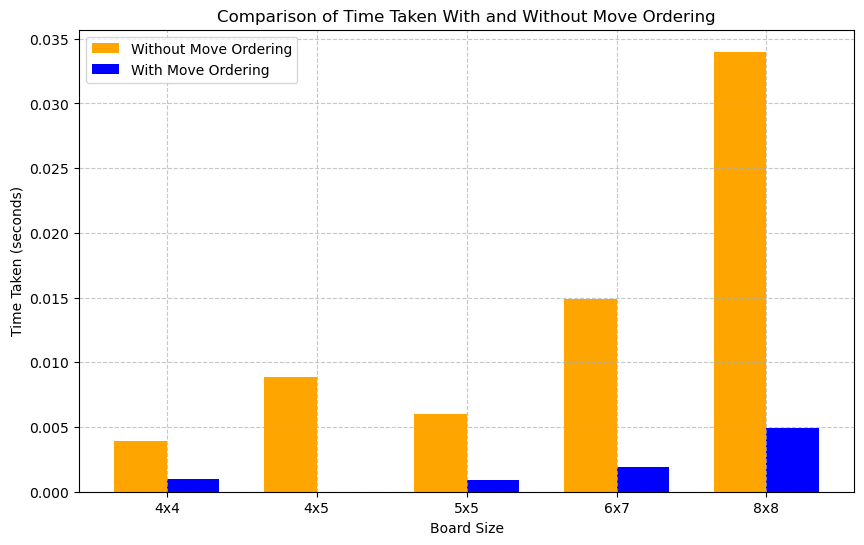

In [17]:
# This block of code provides a visual representation for a simulated run comparing the 
# time taken with move ordering and without move ordering. 
board_sizes = ['4x4', '4x5', '5x5', '6x7', '8x8']
time_without_ordering = [0.0039, 0.0089, 0.0060, 0.0149, 0.0340]
time_with_ordering = [0.0010, 0.0, 0.0009, 0.0019, 0.0049]

bar_width = 0.35
x_pos = np.arange(len(board_sizes))
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x_pos, time_without_ordering, bar_width, label='Without Move Ordering', color='orange')
ax.bar(x_pos + bar_width, time_with_ordering, bar_width, label='With Move Ordering', color='blue')

# Labels and title
ax.set_xlabel('Board Size')
ax.set_ylabel('Time Taken (seconds)')
ax.set_title('Comparison of Time Taken With and Without Move Ordering')
ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels(board_sizes)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)
plt.show()

### **Results from move ordering vs no move ordering**:
- Based on the graph and table above, move ordering significantly reduces the amount of time it takes for a terminal state to be reached. 
- As the size of the board increases, so does the time it takes to reach a terminal state. 
- Without move ordering, the time taken would be significantly higher than it would be with a move ordering strategy in place. 
- In my case, I decided to do move ordering in selecting the middle column of a designated board, as it provides the most advantageous position for both players. 

### **Minimax Agent vs. Random Agent**

In [18]:
def play_games_and_analyze():
    PLAYER_1_wins = 0
    PLAYER_2_wins = 0
    draws = 0

    for _ in range(1000):
        agent = ConnectFourAgent()
        board = agent.create_board(rows=4, columns=4)  # Small board for quick testing
        player = random.choice([1, -1]) 

        while not agent.is_terminal_state(board):
            if player == 1:
                action = agent.minimax(board, 5, float('-inf'), float('inf'), True, player)[0]
            else:
                action = agent.random_agent(board, -1)

            board = agent.result(board, player, action)
            player = -player

        outcome = agent.utility(board)
        if outcome == 1:
            PLAYER_1_wins += 1
        elif outcome == -1:
            PLAYER_2_wins += 1
        else:
            draws += 1

    print("Wins for PLAYER 1:", PLAYER_1_wins)
    print("Wins for PLAYER 2:", PLAYER_2_wins)
    print("Draws:", draws)

play_games_and_analyze()

Wins for PLAYER 1: 742
Wins for PLAYER 2: 150
Draws: 108


- **Wins for PLAYER 1: 70-80%**: This indicates that the Minimax Search agent, playing as the `PLAYER 1`, won the majority of the games. Averaging more than 700 wins out of 1000 games with each run, the Minimax Search agent demonstrates its effectiveness in finding winning strategies and exploiting weaknesses in the random agent's moves.

- **Wins for PLAYER 2: 10-20%**: The random agent (`PLAYER 2`) manages to win between 100 to 200 games out of 1000, which is a significant portion considering its random nature. This suggests that the random agent can occasionally capitalize on opportunities or make moves that disrupt the Minimax Search agent's strategies.

- **Draws: 10%**: The occurrence of draws in about 100 out of 1000 games is notable. This indicates that both agents are capable of playing defensively and preventing their opponent from securing a victory. However, within 1000 games, the Minimax search agent emerges as the strongest agent. 

Based on these results:

1. **Minimax Search Performance**: The Minimax Search agent demonstrates strong performance by winning the majority of games. Its ability to analyze game states and make strategic decisions allows it to outperform the random agent consistently.

2. **Random Agent Effectiveness**: Despite its random nature, the random agent (`PLAYER 2`) manages to secure a notable number of wins. This suggests that it can sometimes make moves that either exploit weaknesses in the Minimax Search agent's strategy or lead to unexpected victories.

3. **Competitive Gameplay**: The balance between wins for both agents and the occurrence of draws indicates that the gameplay is competitive. Both agents are capable of challenging each other and preventing decisive victories, leading to engaging and balanced gameplay.

Overall, these results demonstrate the effectiveness of the Minimax Search agent in Connect Four, while also highlighting the occasional success of the random agent. Further refinement of strategies and the introduction of heuristic evaluation functions can enhance the competitiveness of the gameplay and lead to more challenging matches.


# Step 4: Implementing a Heuristic Alpha-Beta Tree Search
- The goal of this step is to define and implement a heuristic evaluation function that will improve the search of the state space further.

### Heuristic Evalution Functions:
- **`pick_best_move(board, piece)`**: 
  - Determines the best move for the given board state and current player's piece.
  - Fetches valid column locations where a piece can be dropped.
  - Prioritizes the center column if available.
  - Simulates dropping the piece in each valid column and calculates the score.
  - Returns the column with the highest score.

- **`score_position(board, piece)`**:
  - Calculates the utility score of a given board state for the current player's piece.
  - Scores the center column, horizontal, vertical, and diagonal positions.
  - Uses `evaluate_window()` to score each window of size 4 in the board.
  - Returns the total score for the board state.

- **`evaluate_window(window, piece)`**:
  - Evaluates a window (sequence of 4 cells in a row, column, or diagonal) for the current player's piece.
  - Adds a positive score if the window contains the current player's pieces.
  - Deducts a score if the window contains the opponent's pieces.
  - Returns the calculated score for the window.

In [19]:
def pick_best_move(board, piece):
    valid_locations = ConnectFourAgent.get_valid_locations(board)
    best_score = -10000
    best_col = random.choice(valid_locations)  # Initializes best_col with a random valid location

    # Prioritized center column if available
    if board.shape[1] // 2 in valid_locations:
        return board.shape[1] // 2

    for col in valid_locations:
        row = ConnectFourAgent.get_next_open_row(board, col)
        temp_board = board.copy()
        ConnectFourAgent.drop_piece(temp_board, row, col, piece)
        score = ConnectFourAgent.score_position(temp_board, piece)
        # print(f"Move at column {col} has utility score: {score}")
        if score > best_score:
            best_score = score
            best_col = col
    return best_col

def score_position(board, piece):
    score = 0
    opp_piece = -piece

    # Score for center column
    center_array = [int(i) for i in list(board[:, board.shape[1] // 2])]
    center_count = center_array.count(piece)
    score += center_count * 10  

    # Score horizontal
    for r in range(board.shape[0]):
        row_array = [int(i) for i in list(board[r, :])]
        for c in range(board.shape[1] - 3):
            window = row_array[c:c + 4]
            score += ConnectFourAgent.evaluate_window(window, piece)

    # Score vertical
    for c in range(board.shape[1]):
        col_array = [int(i) for i in list(board[:, c])]
        for r in range(board.shape[0] - 3):
            window = col_array[r:r + 4]
            score += ConnectFourAgent.evaluate_window(window, piece)

    # Score positively sloped diagonal
    for r in range(board.shape[0] - 3):
        for c in range(board.shape[1] - 3):
            window = [board[r + i][c + i] for i in range(4)]
            score += ConnectFourAgent.evaluate_window(window, piece)

    # Score negatively sloped diagonal
    for r in range(board.shape[0] - 3):
        for c in range(board.shape[1] - 3):
            window = [board[r + 3 - i][c + i] for i in range(4)]
            score += ConnectFourAgent.evaluate_window(window, piece)

    return score

def evaluate_window(window, piece):
    score = 0
    opp_piece = -piece

    if window.count(piece) == 4:
        score += 100
    elif window.count(piece) == 3 and window.count(0) == 1:
        score += 5
    elif window.count(piece) == 2 and window.count(0) == 2:
        score += 2

    if window.count(opp_piece) == 3 and window.count(0) == 1:
        score -= 4

    return score

### **`a)`** The next task is to modify the minimax search with alpha-beta pruning to a cutoff search at a specified depth that uses the heuristic evaluation function. 
- I experimented with different cutoff values to see how the agent performs at different depths.

In [20]:
class ConnectFourAgent:
    def __init__(self):
        self.board = self.create_board(rows=6, columns=7)

    @staticmethod
    def create_board(rows, columns):
        return np.zeros((rows, columns), dtype=int)

    @staticmethod
    def random_agent(board, player=1):
        valid_actions = ConnectFourAgent.actions(board)
        if board.shape[1] // 2 in valid_actions:
            return board.shape[1] // 2
        return random.choice(valid_actions)

    @staticmethod
    def actions(board, player=1):
        return [col for col in range(board.shape[1]) if board[0][col] == 0]

    @staticmethod
    def result(board, player, action):
        if board[0][action] != 0:
            print("Error: Illegal move!")
            return None

        row = next((i for i in range(board.shape[0]-1, -1, -1) if board[i][action] == 0), None)

        if row is not None:
            board[row][action] = 1 if player == 1 else -1
            return board
        else:
            print("Error: Column is full!")
            return None

    @staticmethod
    def is_terminal_state(board, player=1):
        return ConnectFourAgent.winning_move(board, 1) or ConnectFourAgent.winning_move(board, -1) or 0 not in board[0]

    @staticmethod
    def winning_move(board, piece, player=1):
        for c in range(board.shape[1] - 3):
            for r in range(board.shape[0]):
                if (
                    board[r][c] == piece
                    and board[r][c + 1] == piece
                    and board[r][c + 2] == piece
                    and board[r][c + 3] == piece
                ):
                    return True

        for c in range(board.shape[1]):
            for r in range(board.shape[0] - 3):
                if (
                    board[r][c] == piece
                    and board[r + 1][c] == piece
                    and board[r + 2][c] == piece
                    and board[r + 3][c] == piece
                ):
                    return True

        for c in range(board.shape[1] - 3):
            for r in range(board.shape[0] - 3):
                if (
                    board[r][c] == piece
                    and board[r + 1][c + 1] == piece
                    and board[r + 2][c + 2] == piece
                    and board[r + 3][c + 3] == piece
                ):
                    return True

        for c in range(board.shape[1] - 3):
            for r in range(3, board.shape[0]):
                if (
                    board[r][c] == piece
                    and board[r - 1][c + 1] == piece
                    and board[r - 2][c + 2] == piece
                    and board[r - 3][c + 3] == piece
                ):
                    return True
        return False

    @staticmethod
    def utility(board, player=1):
        if ConnectFourAgent.winning_move(board, 1):
            return 1 
        elif ConnectFourAgent.winning_move(board, -1):
            return -1 
        elif 0 not in board[0]:
            return 0 
        else:
            return 0 

    @staticmethod
    def get_valid_locations(board, player=1):
        valid_locations = []
        for col in range(board.shape[1]):
            if ConnectFourAgent.is_valid_location(board, col):
                valid_locations.append(col)
        return valid_locations

    @staticmethod
    def is_valid_location(board, col, player=1):
        return board[0][col] == 0

    @staticmethod
    def get_next_open_row(board, col, player=1):
        for r in range(board.shape[0]-1, -1, -1):
            if board[r][col] == 0:
                return r

    @staticmethod
    def drop_piece(board, row, col, piece, player=1):
        board[row][col] = piece
        
    @staticmethod
    def pick_best_move(board, piece=1, player=1):
        valid_locations = ConnectFourAgent.get_valid_locations(board)

        for col in valid_locations:
            row = ConnectFourAgent.get_next_open_row(board, col)
            temp_board = board.copy()
            ConnectFourAgent.drop_piece(temp_board, row, col, piece)
            if ConnectFourAgent.winning_move(temp_board, piece):
                return col  # Prioritizes winning move

        # Checks for opponent's winning moves and blocks them
        opponent_piece = -piece
        for col in valid_locations:
            row = ConnectFourAgent.get_next_open_row(board, col)
            temp_board = board.copy()
            ConnectFourAgent.drop_piece(temp_board, row, col, opponent_piece)
            if ConnectFourAgent.winning_move(temp_board, opponent_piece):
                return col 

        # Orders move based on the defined strategy
        ordered_moves = []

        # Evaluates moves using heuristic function
        for col in valid_locations:
            row = ConnectFourAgent.get_next_open_row(board, col)
            temp_board = board.copy()
            ConnectFourAgent.drop_piece(temp_board, row, col, piece)
            ordered_moves.append((col, ConnectFourAgent.score_position(temp_board, piece)))

        # Sorts moves based on their scores
        ordered_moves.sort(key=lambda x: x[1], reverse=True)

        # Returns the best move after ordering
        return ordered_moves[0][0] if ordered_moves else random.choice(valid_locations)

    @staticmethod
    def score_position(board, piece=1, player=1):
        score = 0

        # Score center column
        center_array = [int(i) for i in list(board[:, board.shape[1] // 2])]
        center_count = center_array.count(piece)
        score += center_count * 10 

        # Score horizontal
        for r in range(board.shape[0]):
            row_array = [int(i) for i in list(board[r, :])]
            for c in range(board.shape[1] - 3):
                window = row_array[c:c + 4]
                score += ConnectFourAgent.evaluate_window(window, piece)

        # Score vertical
        for c in range(board.shape[1]):
            col_array = [int(i) for i in list(board[:, c])]
            for r in range(board.shape[0] - 3):
                window = col_array[r:r + 4]
                score += ConnectFourAgent.evaluate_window(window, piece)

        # Score positively sloped diagonal
        for r in range(board.shape[0] - 3):
            for c in range(board.shape[1] - 3):
                window = [board[r + i][c + i] for i in range(4)]
                score += ConnectFourAgent.evaluate_window(window, piece)

        # Score negatively sloped diagonal
        for r in range(board.shape[0] - 3):
            for c in range(board.shape[1] - 3):
                window = [board[r + 3 - i][c + i] for i in range(4)]
                score += ConnectFourAgent.evaluate_window(window, piece)

        return score

    @staticmethod
    def evaluate_window(window, piece=1, player=1):
        score = 0
        opp_piece = P1_PIECE
        if piece == P1_PIECE:
            opp_piece = P2_PIECE
            
        if window.count(piece) == 4:
            score += 100
        elif window.count(piece) == 3 and window.count(0) == 1:
            score += 5
        elif window.count(piece) == 2 and window.count(0) == 2:
            score += 2

        if window.count(opp_piece) == 3 and window.count(0) == 1:
            score -= 4

        return score

    @staticmethod
    def minimax(board, depth, alpha, beta, maximizing_player, player=1, cutoff=None):
        if depth == 0 or ConnectFourAgent.is_terminal_state(board) or cutoff == 0:
            return None, ConnectFourAgent.score_position(board, player)

        valid_actions = ConnectFourAgent.get_valid_locations(board)

        if maximizing_player:
            max_utility = float('-inf')
            best_action = None

            for action in valid_actions:
                new_board = board.copy()
                new_board = ConnectFourAgent.result(new_board, player, action)
                _, utility = ConnectFourAgent.minimax(new_board, depth - 1, alpha, beta, False, -player, 0 if cutoff is None else cutoff - 1)

                if utility > max_utility:
                    max_utility = utility
                    best_action = action

                alpha = max(alpha, utility)
                if beta <= alpha:
                    break

            return best_action, max_utility
        else:
            min_utility = float('inf')
            best_action = None

            for action in valid_actions:
                new_board = board.copy()
                new_board = ConnectFourAgent.result(new_board, -player, action)
                _, utility = ConnectFourAgent.minimax(new_board, depth - 1, alpha, beta, True, player, 0 if cutoff is None else cutoff - 1)

                if utility < min_utility:
                    min_utility = utility
                    best_action = action

                beta = min(beta, utility)
                if beta <= alpha:
                    break

            return best_action, min_utility

In [21]:
# Function to play multiple games
def play_multiple_games(num_games):
    PLAYER_1_wins = 0
    PLAYER_2_wins = 0
    draws = 0

    for _ in range(num_games):
        agent = ConnectFourAgent()
        player = random.choice([1, -1]) 

        while not agent.is_terminal_state(agent.board):
            if player == 1:
                action = ConnectFourAgent.random_agent(agent.board, player)
            else:
                action, _ = ConnectFourAgent.minimax(agent.board, depth=4, alpha=float('-inf'), beta=float('inf'), maximizing_player=True, player=-1, cutoff=6)

            updated_board = ConnectFourAgent.result(agent.board, player, action)
            player = -1 if player == 1 else 1  

        winner = ConnectFourAgent.utility(updated_board)
        if winner == 1:
            PLAYER_1_wins += 1
        elif winner == -1:
            PLAYER_2_wins += 1
        else:
            draws += 1

    return PLAYER_1_wins, PLAYER_2_wins, draws

# Plays 100 games
PLAYER_1_wins, PLAYER_2_wins, draws = play_multiple_games(100)

print("Results after 100 games:")
print("PLAYER 1 Wins:", PLAYER_1_wins)
print("PLAYER 2 Wins:", PLAYER_2_wins)
print("Draws:", draws)

Results after 100 games:
PLAYER 1 Wins: 41
PLAYER 2 Wins: 59
Draws: 0


- I experimented with different cutoff values within the ranges of 3-8, and I found that the deeper the cutoff value, the more successful the Minimax agent was at winning more games compared to the random agent. 
- In this case, `PLAYER 2` is assigned the minimax agent, and successfully wins on average 55-58 games out of 100, while `PLAYER 1`, the random agent, only wins about 40-50 games out of 100. 
- However, the higher/deeper the cutoff value, the longer it takes for the agent to finish the game. This is indicative of the tradeoff between more search space and longer computational time. 

### **Experimenting with the same manually created boards as above to check if the agent spots wining opportunities.**
- The following block of code uses the agent above on different board sizes

In [22]:
def run_single_game(board):
    player = random.choice([1, -1]) 
    while not ConnectFourAgent.is_terminal_state(board):
        if player == 1:
            action, _ = ConnectFourAgent.minimax(board, depth=4, alpha=float('-inf'), beta=float('inf'), maximizing_player=True, player=1, cutoff=6)
        else:
            action = ConnectFourAgent.random_agent(board, -1)
        board = ConnectFourAgent.result(board, player, action)
        player = -1 if player == 1 else 1  

    winner = ConnectFourAgent.utility(board)
    return board, winner

boards = {
    "4x4 Board": create_board(rows=4, columns=4),
    "4x5 Board": create_board(rows=4, columns=5),
    "5x5 Board": create_board(rows=5, columns=5),
    "6x7 Board": create_board(rows=6, columns=7),
    "8x8 Board": create_board(rows=8, columns=8)
}

move_times_with_ordering = []

# Runs game for each board
for board_name, board in boards.items():
    start_time = time.time() 
    updated_board, winner = run_single_game(board)
    end_time = time.time() 
    move_time = end_time - start_time 
    
    print("Final board:")
    print(updated_board)

    if winner == 1:
        print("PLAYER 1 wins!")
    elif winner == -1:
        print("PLAYER 2 wins!")
    else:
        print("It's a draw!")

    move_times_with_ordering.append((board_name, move_time))  
    print(f"Game on {board_name} board finished. Total time taken: {move_time} seconds")

Final board:
[[ 1  1  1 -1]
 [-1  1 -1 -1]
 [ 1 -1  1 -1]
 [ 1 -1 -1  1]]
PLAYER 1 wins!
Game on 4x4 Board board finished. Total time taken: 0.01347494125366211 seconds
Final board:
[[ 1  1  1  1 -1]
 [-1  1 -1 -1  1]
 [-1 -1  1  1 -1]
 [ 1 -1 -1  1 -1]]
PLAYER 1 wins!
Game on 4x5 Board board finished. Total time taken: 0.04435539245605469 seconds
Final board:
[[-1 -1 -1  0  0]
 [ 1  1  1  0  0]
 [-1  1 -1  0  0]
 [ 1 -1  1  0  0]
 [ 1 -1 -1  1  0]]
PLAYER 1 wins!
Game on 5x5 Board board finished. Total time taken: 0.08631110191345215 seconds
Final board:
[[ 1  0  0 -1 -1  0  0]
 [ 1  0  1  1  1  0  0]
 [ 1  0 -1 -1 -1  0  0]
 [-1 -1  1  1  1  1  0]
 [ 1  1 -1 -1  1 -1  0]
 [ 1 -1 -1  1 -1 -1  0]]
PLAYER 1 wins!
Game on 6x7 Board board finished. Total time taken: 0.41915369033813477 seconds
Final board:
[[ 0  0  0 -1 -1  0  0  0]
 [ 0  0  0 -1  1  0  1  0]
 [ 0  0  0  1 -1  0 -1  0]
 [ 0  0  0  1  1  0  1  0]
 [ 0  0  1 -1 -1  0 -1  0]
 [ 0  0  1  1  1  0  1  0]
 [ 1  0 -1  1 -1 -1 -1 

### **Checking for time taken to complete the game for each board**

In [23]:
# Prints the move times
for board_name, move_time in move_times_with_ordering:
    print(f"Game on {board_name} board finished. Total time taken: {move_time} seconds")

Game on 4x4 Board board finished. Total time taken: 0.01347494125366211 seconds
Game on 4x5 Board board finished. Total time taken: 0.04435539245605469 seconds
Game on 5x5 Board board finished. Total time taken: 0.08631110191345215 seconds
Game on 6x7 Board board finished. Total time taken: 0.41915369033813477 seconds
Game on 8x8 Board board finished. Total time taken: 1.387019395828247 seconds


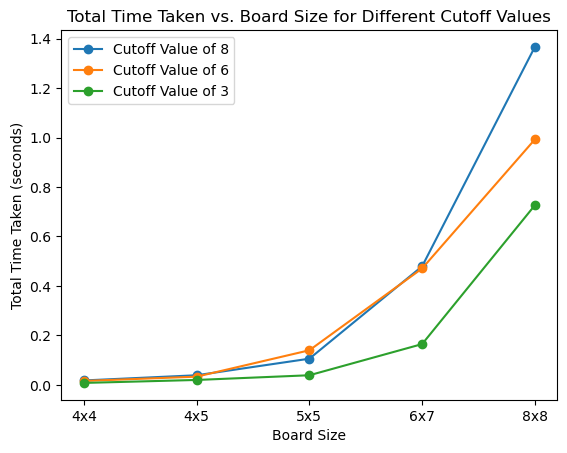

In [24]:
# Data from the a simulation of running the results
# Cutoff value of 8
data = [
    ("4x4", 0.018002748489379883),
    ("4x5", 0.039002180099487305),
    ("5x5", 0.10599565505981445),
    ("6x7", 0.47934436798095703),
    ("8x8", 1.366208553314209),
]

# Cutoff Value of 6
data2 = [
    ("4x4", 0.016000032424926758),
    ("4x5", 0.03332686424255371),
    ("5x5", 0.14000248908996582),
    ("6x7", 0.470747709274292 ),
    ("8x8", 0.9922592639923096 ),
]

# Cutoff value of 3
data3 = [
    ("4x4", 0.008000373840332031),
    ("4x5", 0.020000934600830078),
    ("5x5", 0.03899741172790527),
    ("6x7", 0.16500186920166016),
    ("8x8", 0.7261707782745361),
]

# Separates the data into board sizes and times for each dataset
board_sizes = [x[0] for x in data]
times = [x[1] for x in data]

board_sizes2 = [x[0] for x in data2]
times2 = [x[1] for x in data2]

board_sizes3 = [x[0] for x in data3]
times3 = [x[1] for x in data3]

plt.figure()
plt.plot(board_sizes, times, marker='o', label='Cutoff Value of 8')
plt.plot(board_sizes2, times2, marker='o', label='Cutoff Value of 6')
plt.plot(board_sizes3, times3, marker='o', label='Cutoff Value of 3')
plt.xlabel('Board Size')
plt.ylabel('Total Time Taken (seconds)')
plt.title('Total Time Taken vs. Board Size for Different Cutoff Values')
plt.legend()
plt.show()

### **Two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other**
- The goal is to see which heuristic agent comes out on top when experimenting with different cutoff depths and heuristic evaluation functions

In [25]:
class ConnectFourAgent:
    def __init__(self):
        self.board = self.create_board(rows=6, columns=7)

    @staticmethod
    def create_board(rows, columns):
        return np.zeros((rows, columns), dtype=int)

    @staticmethod
    def actions(board, player=1):
        return [col for col in range(board.shape[1]) if board[0][col] == 0]

    @staticmethod
    def result(board, player, action):
        if board[0][action] != 0:
            print("Error: Illegal move!")
            return None

        row = next((i for i in range(board.shape[0]-1, -1, -1) if board[i][action] == 0), None)

        if row is not None:
            board[row][action] = player
            return board
        else:
            print("Error: Column is full!")
            return None

    @staticmethod
    def is_terminal_state(board, player=1):
        return ConnectFourAgent.winning_move(board, 1) or ConnectFourAgent.winning_move(board, -1) or 0 not in board[0]

    @staticmethod
    def winning_move(board, piece, player=1):
        # Check for winning moves (horizontal, vertical, diagonals)
        for c in range(board.shape[1] - 3):
            for r in range(board.shape[0]):
                if (
                    board[r][c] == piece
                    and board[r][c + 1] == piece
                    and board[r][c + 2] == piece
                    and board[r][c + 3] == piece
                ):
                    return True
        for c in range(board.shape[1]):
            for r in range(board.shape[0] - 3):
                if (
                    board[r][c] == piece
                    and board[r + 1][c] == piece
                    and board[r + 2][c] == piece
                    and board[r + 3][c] == piece
                ):
                    return True
        for c in range(board.shape[1] - 3):
            for r in range(board.shape[0] - 3):
                if (
                    board[r][c] == piece
                    and board[r + 1][c + 1] == piece
                    and board[r + 2][c + 2] == piece
                    and board[r + 3][c + 3] == piece
                ):
                    return True
        for c in range(board.shape[1] - 3):
            for r in range(3, board.shape[0]):
                if (
                    board[r][c] == piece
                    and board[r - 1][c + 1] == piece
                    and board[r - 2][c + 2] == piece
                    and board[r - 3][c + 3] == piece
                ):
                    return True
        return False

    # Heuristic evaluation function for Agent 1
    @staticmethod
    def score_position_agent1(board, piece, player=1):
        score = 0
        center_array = [int(i) for i in list(board[:, board.shape[1] // 2])]
        center_count = center_array.count(piece)
        score += center_count * 10  # Prioritize center control

        # Horizontal scoring
        for r in range(board.shape[0]):
            row_array = [int(i) for i in list(board[r, :])]
            for c in range(board.shape[1] - 3):
                window = row_array[c:c + 4]
                score += ConnectFourAgent.evaluate_window_agent1(window, piece)

        # Vertical scoring
        for c in range(board.shape[1]):
            col_array = [int(i) for i in list(board[:, c])]
            for r in range(board.shape[0] - 3):
                window = col_array[r:r + 4]
                score += ConnectFourAgent.evaluate_window_agent1(window, piece)

        # Positively sloped diagonal scoring
        for r in range(board.shape[0] - 3):
            for c in range(board.shape[1] - 3):
                window = [board[r + i][c + i] for i in range(4)]
                score += ConnectFourAgent.evaluate_window_agent1(window, piece)

        # Negatively sloped diagonal scoring
        for r in range(board.shape[0] - 3):
            for c in range(board.shape[1] - 3):
                window = [board[r + 3 - i][c + i] for i in range(4)]
                score += ConnectFourAgent.evaluate_window_agent1(window, piece)

        return score

    @staticmethod
    def evaluate_window_agent1(window, piece, player=1):
        score = 0
        opp_piece = -piece
        if window.count(piece) == 4:
            score += 100  # Winning move
        elif window.count(piece) == 3 and window.count(0) == 1:
            score += 10  # Almost winning move
        elif window.count(piece) == 2 and window.count(0) == 2:
            score += 3  # Potential future move

        if window.count(opp_piece) == 3 and window.count(0) == 1:
            score -= 8  # Block opponent

        return score

    # Heuristic evaluation function for Agent 2
    @staticmethod
    def score_position_agent2(board, piece, player=-1):
        score = 0
        # Give higher weight to center columns for stability
        center_array = [int(i) for i in list(board[:, board.shape[1] // 2])]
        center_count = center_array.count(piece)
        score += center_count * 4

        # Horizontal scoring
        for r in range(board.shape[0]):
            row_array = [int(i) for i in list(board[r, :])]
            for c in range(board.shape[1] - 3):
                window = row_array[c:c + 4]
                score += ConnectFourAgent.evaluate_window_agent2(window, piece)

        # Vertical scoring
        for c in range(board.shape[1]):
            col_array = [int(i) for i in list(board[:, c])]
            for r in range(board.shape[0] - 3):
                window = col_array[r:r + 4]
                score += ConnectFourAgent.evaluate_window_agent2(window, piece)

        # Positively sloped diagonal scoring
        for r in range(board.shape[0] - 3):
            for c in range(board.shape[1] - 3):
                window = [board[r + i][c + i] for i in range(4)]
                score += ConnectFourAgent.evaluate_window_agent2(window, piece)

        # Negatively sloped diagonal scoring
        for r in range(board.shape[0] - 3):
            for c in range(board.shape[1] - 3):
                window = [board[r + 3 - i][c + i] for i in range(4)]
                score += ConnectFourAgent.evaluate_window_agent2(window, piece)

        return score

    @staticmethod
    def evaluate_window_agent2(window, piece, player=-1):
        score = 0
        opp_piece = -piece
        if window.count(piece) == 4:
            score += 100  # Winning move
        elif window.count(piece) == 3 and window.count(0) == 1:
            score += 5  # Almost winning move
        elif window.count(piece) == 2 and window.count(0) == 2:
            score += 2  # Potential future move

        if window.count(opp_piece) == 3 and window.count(0) == 1:
            score -= 6  # Block opponent

        return score

    @staticmethod
    def minimax(board, depth, alpha, beta, maximizing_player, player=1, cutoff=None, heuristic_function=None):
        if depth == 0 or ConnectFourAgent.is_terminal_state(board) or cutoff == 0:
            return None, heuristic_function(board, player)

        valid_actions = ConnectFourAgent.get_valid_locations(board)

        if maximizing_player:
            max_utility = float('-inf')
            best_action = None

            for action in valid_actions:
                new_board = board.copy()
                new_board = ConnectFourAgent.result(new_board, player, action)
                _, utility = ConnectFourAgent.minimax(
                    new_board, depth - 1, alpha, beta, False, -player, cutoff, heuristic_function)

                if utility > max_utility:
                    max_utility = utility
                    best_action = action

                alpha = max(alpha, utility)
                if beta <= alpha:
                    break

            return best_action, max_utility
        else:
            min_utility = float('inf')
            best_action = None

            for action in valid_actions:
                new_board = board.copy()
                new_board = ConnectFourAgent.result(new_board, -player, action)
                _, utility = ConnectFourAgent.minimax(
                    new_board, depth - 1, alpha, beta, True, player, cutoff, heuristic_function)

                if utility < min_utility:
                    min_utility = utility
                    best_action = action

                beta = min(beta, utility)
                if beta <= alpha:
                    break

            return best_action, min_utility

    @staticmethod
    def get_valid_locations(board, player=1):
        valid_locations = []
        for col in range(board.shape[1]):
            if ConnectFourAgent.is_valid_location(board, col):
                valid_locations.append(col)
        return valid_locations

    @staticmethod
    def is_valid_location(board, col, player=1):
        return board[0][col] == 0

    @staticmethod
    def get_next_open_row(board, col, player=1):
        for r in range(board.shape[0] - 1, -1, -1):
            if board[r][col] == 0:
                return r

    @staticmethod
    def drop_piece(board, row, col, piece, player=1):
        board[row][col] = piece

def play_game():
    agent = ConnectFourAgent()
    board = agent.create_board(rows=6, columns=7)
    current_player = random.choice([1, -1])

    # Configurations for each agent
    agent_1_cutoff_depth = 6  # Agent 1's minimax cutoff depth
    agent_2_cutoff_depth = 3  # Agent 2's minimax cutoff depth

    # Play the game
    while not agent.is_terminal_state(board):
        if current_player == 1:
            # Agent 1's turn
            action, _ = agent.minimax(
                board, depth=agent_1_cutoff_depth, alpha=float('-inf'), beta=float('inf'),
                maximizing_player=True, player=current_player,
                heuristic_function=agent.score_position_agent1
            )

            agent.result(board, current_player, action)
        else:
            # Agent 2's turn
            action, _ = agent.minimax(
                board, depth=agent_2_cutoff_depth, alpha=float('-inf'), beta=float('inf'),
                maximizing_player=True, player=current_player,
                heuristic_function=agent.score_position_agent2
            )

            agent.result(board, current_player, action)

        current_player *= -1

    print("Final Board State:")
    print(board)

    if agent.winning_move(board, 1):
        print("PLAYER 1 wins!")
    elif agent.winning_move(board, -1):
        print("PLAYER 2 wins!")
    else:
        print("It's a draw!")

play_game()

Final Board State:
[[ 0  0  0 -1  0  0  0]
 [ 0  0  0 -1  0  0  1]
 [-1  0 -1  1  0  0  1]
 [-1  0  1  1  0  0 -1]
 [ 1  1 -1 -1  0  0  1]
 [ 1  1 -1 -1  0  0  1]]
PLAYER 1 wins!


- Given that `PLAYER 1's` cutoff depth is deeper than `PLAYER 2's`, it is expected that `PLAYER 1` will win more games because it will consider more possible moves and counter-moves in its decision-making process. 
- The tradeoff with a higher cutoff depth is longer computation time. 
- I experimented with higher cutoff values (8) and found that the computation time would increase (from approximately 5s when cutoff was 6 to about 40s when it was 8).

- In terms of each agents' heuristic evaluation function, `PLAYER 1` has more emphasis on having center control, whereas `PLAYER 2` has less emphasis. 
- Assigning a lower weight to the center columns for `PLAYER 2` may enable the agent to prioritize other areas of the board. 
- Given that the center column is generally the most strategic move, this can lead to less successful wins from `PLAYER 2`. 
- In addition, the scoring values for `PLAYER 2` has less weight compared to `PLAYER 1` so it won't be as inclined to go for a winning move if it sees it. 
- In summary, `PLAYER 1` focus more on keeping control of the center columns and aggressively pursuing winning positions, while `PLAYER 2` does not emphasize the same intensity of control and winning positions. 

# Step 5: Implementing `Pure Monte Carlo Search` & `Best First Move`
- `Pure Monte Carlo Search` essentially plays a lot of games and picks the move with the best average score among those games. 

In [26]:
class ConnectFourAgent:
    def __init__(self):
        self.board = self.create_board()

    @staticmethod
    def create_board(rows=6, columns=7):
        return np.zeros((rows, columns), dtype=int)

    @staticmethod
    def random_agent(board, player=1):
        valid_actions = ConnectFourAgent.actions(board)
        if board.shape[1] // 2 in valid_actions:
            return board.shape[1] // 2
        return random.choice(valid_actions)

    @staticmethod
    def actions(board, player=1):
        return [col for col in range(board.shape[1]) if board[0][col] == 0]

    @staticmethod
    def result(board, player, action):
        if board[0][action] != 0:
            print("Error: Illegal move!")
            return None

        row = next((i for i in range(board.shape[0] - 1, -1, -1) if board[i][action] == 0), None)

        if row is not None:
            board[row][action] = 1 if player == 1 else -1
            return board
        else:
            print("Error: Column is full!")
            return None

    @staticmethod
    def is_terminal_state(board, player=1):
        return ConnectFourAgent.winning_move(board, 1) or ConnectFourAgent.winning_move(board, -1) or 0 not in board[0]

    @staticmethod
    def winning_move(board, piece, player=1):
        for c in range(board.shape[1] - 3):
            for r in range(board.shape[0]):
                if (
                    board[r][c] == piece
                    and board[r][c + 1] == piece
                    and board[r][c + 2] == piece
                    and board[r][c + 3] == piece
                ):
                    return True
        for c in range(board.shape[1]):
            for r in range(board.shape[0] - 3):
                if (
                    board[r][c] == piece
                    and board[r + 1][c] == piece
                    and board[r + 2][c] == piece
                    and board[r + 3][c] == piece
                ):
                    return True
        for c in range(board.shape[1] - 3):
            for r in range(board.shape[0] - 3):
                if (
                    board[r][c] == piece
                    and board[r + 1][c + 1] == piece
                    and board[r + 2][c + 2] == piece
                    and board[r + 3][c + 3] == piece
                ):
                    return True
        for c in range(board.shape[1] - 3):
            for r in range(3, board.shape[0]):
                if (
                    board[r][c] == piece
                    and board[r - 1][c + 1] == piece
                    and board[r - 2][c + 2] == piece
                    and board[r - 3][c + 3] == piece
                ):
                    return True
        return False

    @staticmethod
    def utility(board, player=1):
        if ConnectFourAgent.winning_move(board, 1):
            return 1  
        elif ConnectFourAgent.winning_move(board, -1):
            return -1 
        elif 0 not in board[0]:
            return 0 
        else:
            return 0 

    @staticmethod
    def monte_carlo_search(board, num_simulations, player=1):
        win_counts = {action: 0 for action in ConnectFourAgent.actions(board)}
        
        for _ in range(num_simulations):
            action = random.choice(ConnectFourAgent.actions(board))
            sim_board = board.copy()
            sim_board = ConnectFourAgent.result(sim_board, player, action)
            result = ConnectFourAgent.simulate_game(sim_board, player)
            if result == player:
                win_counts[action] += 1
        
        best_action = max(win_counts, key=win_counts.get)
        
        return best_action

    @staticmethod
    def simulate_game(board, player):
        current_player = player
        while not ConnectFourAgent.is_terminal_state(board):
            action = ConnectFourAgent.random_agent(board, current_player)
            board = ConnectFourAgent.result(board, current_player, action)
            current_player *= -1
        
        outcome = ConnectFourAgent.utility(board)
        
        return outcome

In [27]:
def run_single_game_monte_carlo(board, num_simulations=1000):
    player = random.choice([1, -1])
    
    while not ConnectFourAgent.is_terminal_state(board):
        if player == 1:
            # Uses Monte Carlo search for PLAYER 1
            best_move = ConnectFourAgent.monte_carlo_search(board, num_simulations, player)
        else:
            # Uses random agent for PLAYER 2
            best_move = ConnectFourAgent.monte_carlo_search(board, num_simulations, player)
        
        board = ConnectFourAgent.result(board, player, best_move)
         
        player = -player
        
    outcome = ConnectFourAgent.utility(board)
    
    return outcome, board

boards = {
    "4x4 Board": ConnectFourAgent.create_board(4, 4),
    "4x5 Board": ConnectFourAgent.create_board(4, 5),
    "5x5 Board": ConnectFourAgent.create_board(5, 5),
    "6x7 Board": ConnectFourAgent.create_board(6, 7),
    "8x8 Board": ConnectFourAgent.create_board(8, 8)
}

# List to store the move times and results for each game
results = []

for board_name, board in boards.items():
    start_time = time.time()
    
    # Runs a single game using Monte Carlo simulations
    outcome, final_board = run_single_game_monte_carlo(board)
    
    end_time = time.time()
    move_time = end_time - start_time
    
    print(f"Final board ({board_name}):")
    print(final_board)
    
    if outcome == 1:
        print("PLAYER 1 wins!")
    elif outcome == -1:
        print("PLAYER 2 wins!")
    else:
        print("It's a draw!")

    results.append((board_name, move_time, outcome))

    print(f"Game on {board_name} board finished. Total time taken: {move_time} seconds")
    print("-" * 40)  # Separator for clarity

Final board (4x4 Board):
[[ 1  1  0  0]
 [-1  1  0  0]
 [-1 -1 -1 -1]
 [ 1  1 -1  1]]
PLAYER 2 wins!
Game on 4x4 Board board finished. Total time taken: 2.4012296199798584 seconds
----------------------------------------
Final board (4x5 Board):
[[ 0 -1  0 -1  0]
 [ 0 -1  0  1  1]
 [ 0 -1  0 -1  1]
 [ 1  1  1  1 -1]]
PLAYER 1 wins!
Game on 4x5 Board board finished. Total time taken: 3.3712856769561768 seconds
----------------------------------------
Final board (5x5 Board):
[[ 0  0  0  0  0]
 [ 0  0  1 -1  0]
 [ 0  0  1 -1  0]
 [ 0  0  1  1 -1]
 [ 0  1  1 -1 -1]]
PLAYER 1 wins!
Game on 5x5 Board board finished. Total time taken: 5.546760320663452 seconds
----------------------------------------
Final board (6x7 Board):
[[ 0  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0]
 [ 0  1  1  0 -1  0  0]
 [ 0 -1  1  0 -1  0  0]
 [ 1  1  1  0 -1  0  0]
 [-1 -1 -1  1 -1  1  0]]
PLAYER 2 wins!
Game on 6x7 Board board finished. Total time taken: 15.698630809783936 seconds
--------------------------------

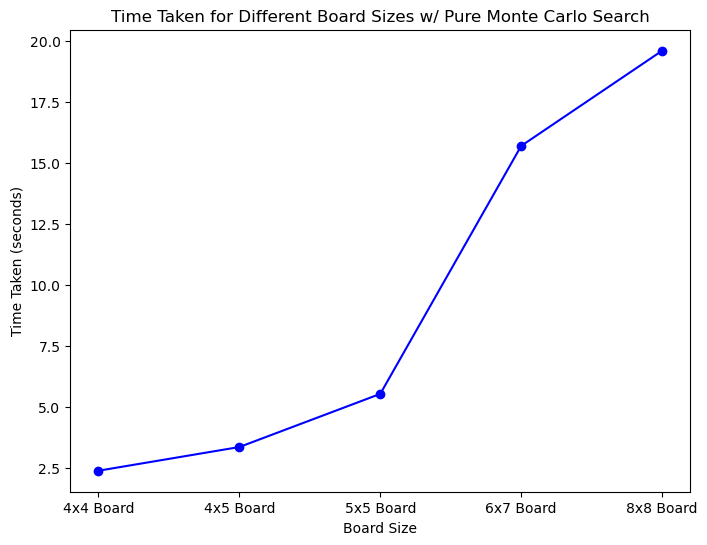

In [28]:
# This block of code is used to show the time taken for each board size when using Pure Monte Carlo Search
# Extracts data from the results list
board_names = [result[0] for result in results]
move_times = [result[1] for result in results]

plt.figure(figsize=(8, 6))
plt.plot(board_names, move_times, marker='o', linestyle='-', color='b')

plt.xlabel('Board Size')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Taken for Different Board Sizes w/ Pure Monte Carlo Search')
plt.show()

### **Determining the Best First Move**
- The following block of code uses `Pure Monte Carlo Search` to determine the `best first move` for each board size

In [29]:
class ConnectFourAgent:
    @staticmethod
    def create_board(rows=6, columns=7):
        return np.zeros((rows, columns), dtype=int)

    @staticmethod
    def actions(board):
        return [col for col in range(board.shape[1]) if board[0][col] == 0]

    @staticmethod
    def result(board, player, action):
        for row in range(board.shape[0] - 1, -1, -1):
            if board[row][action] == 0:
                board[row][action] = player
                return board
        return None 

    @staticmethod
    def is_terminal_state(board):
        return (ConnectFourAgent.winning_move(board, 1) or 
                ConnectFourAgent.winning_move(board, -1) or 
                0 not in board[0])

    @staticmethod
    def winning_move(board, piece):
        # Horizontal win
        for r in range(board.shape[0]):
            for c in range(board.shape[1] - 3):
                if (board[r][c] == piece and board[r][c + 1] == piece and
                    board[r][c + 2] == piece and board[r][c + 3] == piece):
                    return True

        # Vertical win
        for c in range(board.shape[1]):
            for r in range(board.shape[0] - 3):
                if (board[r][c] == piece and board[r + 1][c] == piece and
                    board[r + 2][c] == piece and board[r + 3][c] == piece):
                    return True

        # Diagonal (positive slope) win
        for r in range(board.shape[0] - 3):
            for c in range(board.shape[1] - 3):
                if (board[r][c] == piece and board[r + 1][c + 1] == piece and
                    board[r + 2][c + 2] == piece and board[r + 3][c + 3] == piece):
                    return True

        # Diagonal (negative slope) win
        for r in range(3, board.shape[0]):
            for c in range(board.shape[1] - 3):
                if (board[r][c] == piece and board[r - 1][c + 1] == piece and
                    board[r - 2][c + 2] == piece and board[r - 3][c + 3] == piece):
                    return True

        return False

    @staticmethod
    def utility(board):
        if ConnectFourAgent.winning_move(board, 1):
            return 1  
        elif ConnectFourAgent.winning_move(board, -1):
            return -1  
        elif 0 not in board[0]:
            return 0 
        else:
            return None 

    @staticmethod
    def simulate_game(board, player):
        while not ConnectFourAgent.is_terminal_state(board):
            action = random.choice(ConnectFourAgent.actions(board))
            
            ConnectFourAgent.result(board, player, action)
            player *= -1  
        
        return ConnectFourAgent.utility(board)

    @staticmethod
    def find_best_first_move(rows=6, columns=7, num_simulations=1000):
        board = ConnectFourAgent.create_board(rows, columns)
        
        # Stores win rates for each possible first move
        win_rates = {action: 0 for action in ConnectFourAgent.actions(board)}
        
        # Runs simulations for each possible first move
        for action in win_rates:
            wins = 0  # Counts PLAYER 1 wins for this action
            
            for _ in range(num_simulations):
                # Creates a copy of the initial board
                sim_board = board.copy()
                
                # Applies the first move for PLAYER 1
                ConnectFourAgent.result(sim_board, 1, action)
                
                # Simulates the game from this state for PLAYER 2
                outcome = ConnectFourAgent.simulate_game(sim_board, -1)
                
                # Checks if PLAYER 1 wins
                if outcome == 1:
                    wins += 1
            
            # Calculates win rate for the current action
            win_rates[action] = wins / num_simulations
        
        # Finds the best first move with the highest win rate
        best_first_move = max(win_rates, key=win_rates.get)
        return best_first_move, win_rates[best_first_move]

board_sizes = {
    "4x4": (4, 4),
    "4x5": (4, 5),
    "5x5": (5, 5),
    "6x7": (6, 7),
    "8x8": (8, 8)
}

# List to store the results for each board size
results = []

# Runs the best first move test for each board size
for board_name, (rows, columns) in board_sizes.items():
    best_first_move, win_rate = ConnectFourAgent.find_best_first_move(rows=rows, columns=columns, num_simulations=1000)
    results.append((board_name, best_first_move, win_rate))
    
    print(f"For {board_name} board, the best first move is column {best_first_move} with a win rate of {win_rate:.2%}")

For 4x4 board, the best first move is column 0 with a win rate of 32.90%
For 4x5 board, the best first move is column 3 with a win rate of 44.40%
For 5x5 board, the best first move is column 3 with a win rate of 54.10%
For 6x7 board, the best first move is column 3 with a win rate of 64.20%
For 8x8 board, the best first move is column 4 with a win rate of 60.10%


- For each of the boards, the "best" first move is made under the assumption that both players are equally skilled and have an equal opportunity to win. 
- For each board, the "best" first move is generally consistent with controlling the center column, as this provides the most advantageous position for the players to build their consecutive pieces. 
- The win rates indiciate that the players have a greater chance at winning by having their "best" first move performed in the designated column for each board size. 